In [2]:
import yfinance as yf
import pandas as pd
import matplotlib

In [3]:
#input text file of tickers separated by spaces
with open('stocks.txt','r') as f: #must open read only for some reason
    stock_txt = f.read()
#create list of ticker strings
stocks = stock_txt.split()

In [4]:
ticker = yf.Ticker(stocks[0])
df_balance = ticker.balance_sheet
print(df_balance)

                                                2021-12-31    2020-12-31  \
Intangible Assets                             1.103759e+09  6.680210e+08   
Capital Surplus                               2.140608e+09  2.121288e+09   
Total Liab                                    1.121928e+10  8.893533e+09   
Total Stockholder Equity                      1.401639e+10  1.078866e+10   
Minority Interest                             5.874050e+08  4.431960e+08   
Other Current Liab                            3.943280e+08  2.602610e+08   
Total Assets                                  2.582307e+10  2.012539e+10   
Common Stock                                  1.520610e+08  1.520610e+08   
Other Current Assets                          2.013400e+08  1.169480e+08   
Retained Earnings                             1.767410e+10  1.134385e+10   
Other Liab                                    1.026294e+09  9.181480e+08   
Good Will                                     2.827344e+09  2.229672e+09   
Gains Losses

                     2021-12-31 2020-12-31 2019-12-31 2018-12-31
Asset Turnover         1.412843   1.000709   1.231358   1.398798
Return on Equity       0.487106   0.066873   0.122722   0.241089
Operating Margin       0.254271   0.079649   0.085566   0.132631
Profit Margin          0.264394   0.035849   0.069292   0.131735
Debt to Equity         0.342245   0.481277    0.40697   0.432316
Debt to Total Assets   0.434467   0.441906   0.411754   0.430712
                     2021-12-31 2020-12-31 2019-12-31 2018-12-31
Asset Turnover         1.469037   1.036255   1.264535   1.534594
Return on Equity       0.509794   0.126767   0.164654   0.319786
Operating Margin       0.233643   0.090252   0.094303   0.145697
Profit Margin          0.256484   0.059448   0.081093    0.16335
Debt to Equity          0.47722   0.694055   0.648944   0.597826
Debt to Total Assets   0.495647   0.530711   0.508824   0.495399
                     2021-12-31 2020-12-31 2019-12-31 2018-12-31
Asset Turnover         1.

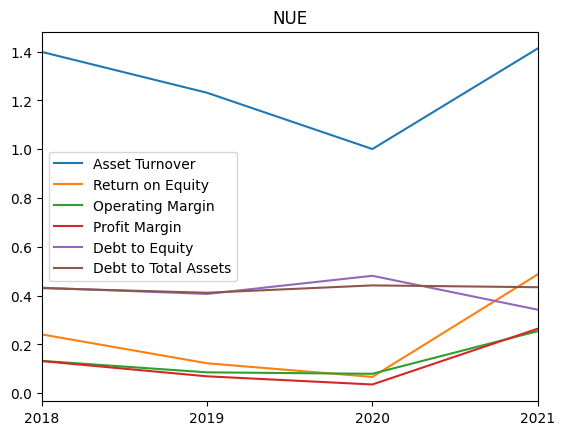

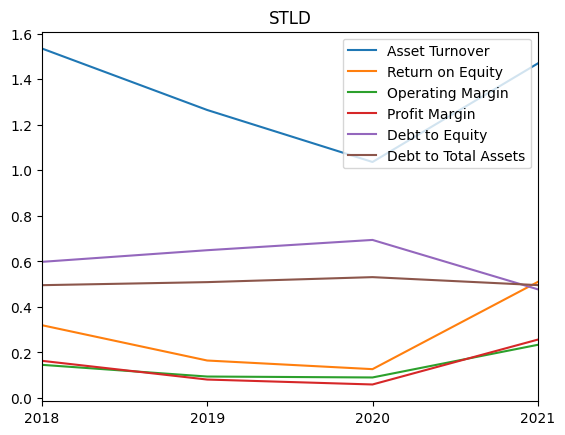

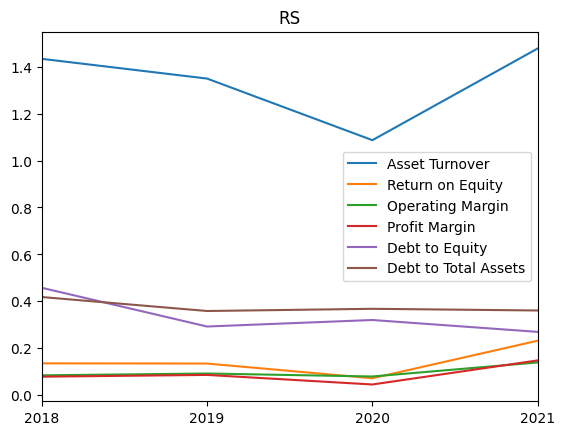

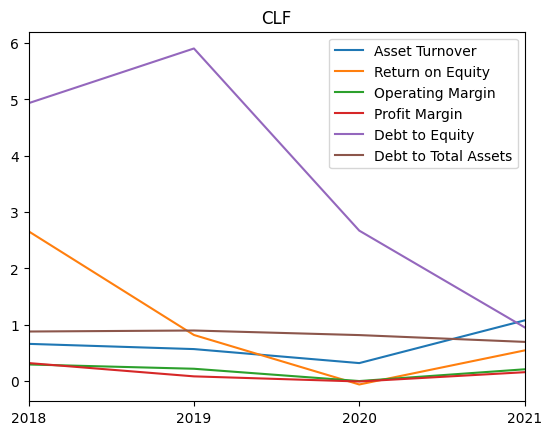

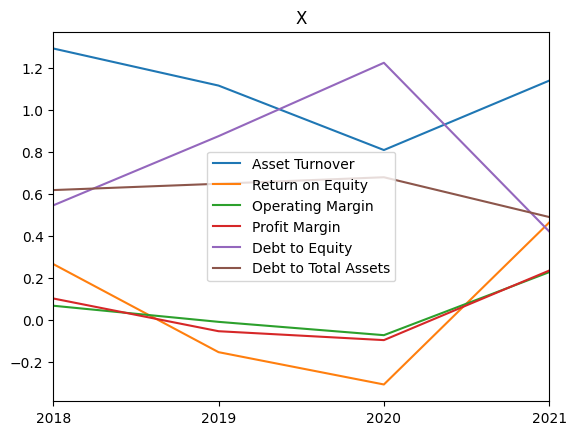

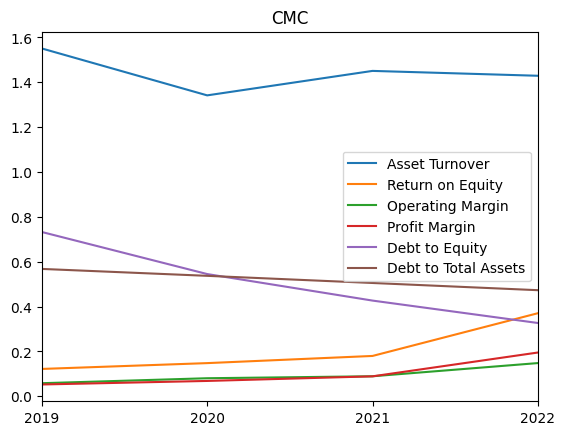

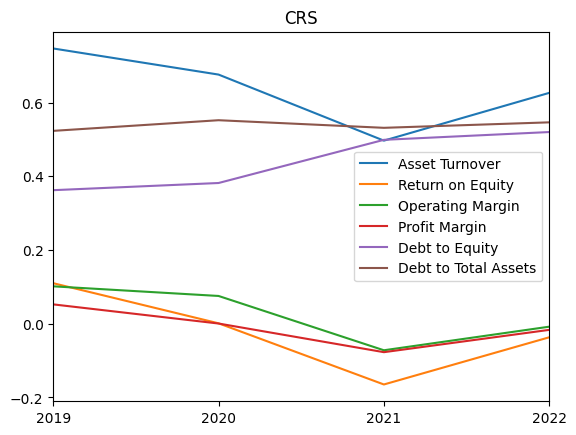

In [7]:
dataframes = []
for stock in stocks:
    ticker = yf.Ticker(stock)
    df = ticker.financials #income statement pandas dataframe
    df_b = ticker.balance_sheet #balance sheet pandas dataframe
    #find all relevant lines in balance sheet and income statement
    IS = df.loc[['Net Income','Operating Income','Total Revenue']]
    BS = df_b.loc[['Total Assets', 'Total Stockholder Equity','Total Liab','Long Term Debt']]
    dff = pd.concat([IS,BS], axis = 0)
    #calculate ratios
    dff.loc['Asset Turnover'] = dff.loc['Total Revenue']/dff.loc['Total Assets']
    dff.loc['Return on Equity'] = dff.loc['Net Income']/dff.loc['Total Stockholder Equity']
    dff.loc['Operating Margin'] = dff.loc['Operating Income']/dff.loc['Total Revenue']
    dff.loc['Profit Margin'] = dff.loc['Net Income']/dff.loc['Total Assets']
    dff.loc['Debt to Equity'] = dff.loc['Long Term Debt']/dff.loc['Total Stockholder Equity']
    dff.loc['Debt to Total Assets'] = dff.loc['Total Liab']/dff.loc['Total Assets']
    #drop lines used to calculate
    dff = dff.drop(['Net Income','Operating Income','Total Revenue','Total Assets', 'Total Stockholder Equity','Total Liab','Long Term Debt'], axis = 0)
    print(dff)
    #transpose and plot
    dff = dff.transpose()
    dataframes.append(dff)
    dff.plot(kind = 'line')
    matplotlib.pyplot.title(stock)
    #export image
    matplotlib.pyplot.savefig(f'{stock}.png')
    

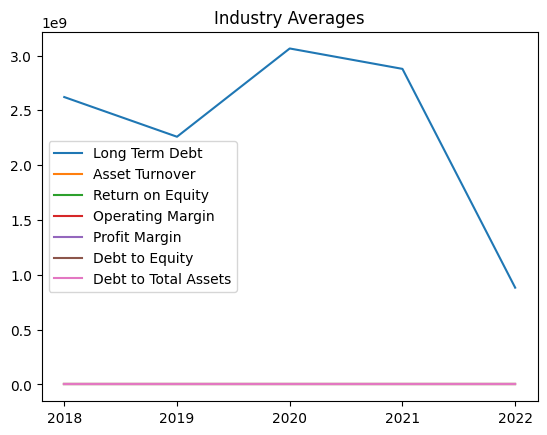

In [6]:
#combine company dataframes
dataframe = pd.concat(dataframes, axis = 0)
ratio_names = dataframe.columns

#empty dict to hold average ratios
avg_dict = {}

#list of years in large dataframe
years = list(dict.fromkeys(dataframe.index.year))

for year in years:
    avgs = [] #initialize empty list for average ratios
    df_current = dataframe[dataframe.index.year==year] #filter out rows with current year as year
    ratios = list(df_current.columns) #ratios to calculate
    for ratio in ratios:
        avgs.append(df_current[ratio].mean()) #calculate and append average ratio to avgs
    avg_dict[year] = avgs #add avgs list to dictionary
    #print(avgs)

avg_df = pd.DataFrame.from_dict(avg_dict, orient = 'index',columns = ratio_names )
avg_df.sort_index(axis =0, inplace = True)
#print(avg_df)

#plot
title = 'Industry Averages'
avg_df.plot(kind = 'line')
matplotlib.pyplot.title(title)
matplotlib.pyplot.xticks(years)

#export image
matplotlib.pyplot.savefig(f'{title}.png')
